# Data Exploration
### What can we learn from all this data?

In [14]:
import types
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing as process
import math
import folium
pd.set_option('display.max_rows', 500)

In [16]:
seattle_home_sales = pd.read_csv(path)
seattle_home_sales.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


# Get to know the Features

In [17]:
list(seattle_home_sales.columns)

['SalePrice',
 'SqFt1stFloor',
 'SqFtHalfFloor',
 'SqFt2ndFloor',
 'SqFtUpperFloor',
 'SqFtTotLiving',
 'SqFtTotBasement',
 'SqFtFinBasement',
 'SqFtGarageBasement',
 'SqFtGarageAttached',
 'DaylightBasement',
 'SqFtOpenPorch',
 'SqFtEnclosedPorch',
 'SqFtDeck',
 'BrickStone',
 'Bedrooms',
 'BathHalfCount',
 'Bath3qtrCount',
 'BathFullCount',
 'YrBuilt',
 'PcntComplete',
 'Longitude',
 'Latitude',
 'Trail',
 'Other Great Outdoors',
 'Elementary School',
 'General Entertainment',
 'Park',
 'Mexican Restaurant',
 'Vietnamese Restaurant',
 'Thai Restaurant',
 'Gas Station',
 'Housing Development',
 'Pool',
 'Dive Bar',
 'Convenience Store',
 'Middle School',
 'Grocery Store',
 'Bar',
 'Brewery',
 'School',
 'Salon / Barbershop',
 'Beach',
 'Playground',
 'Lake',
 'Medical Center',
 'Baseball Field',
 'Gym / Fitness Center',
 'Farmers Market',
 'Building',
 'Scenic Lookout',
 'Church',
 'Preschool',
 'Café',
 'Library',
 'Farm',
 'Community Center',
 'BBQ Joint',
 'High School',
 'Supermar

## Features

* **PIN** is Parcel Identification Number, our unique index of land parcels.

* **SalePrice** is how much the parcel last sold for, between 100,000 and 2,000,000.

* **SqFt* Features** are variables for how big different parts of the home and parcel are.

* **DaylightBasement** is a boolean of whether the basement gets light.

* **Brickstone** is the percentage of the building made of brick or stone.

* **Bedrooms** is the number of bedrooms.

* **Bath* Features** are counts of different kinds of bathrooms.

* **YrBuild** is the year the building was built.

* **Latitude** and Longitude show the location of the land parcel.

* **Venue categorys** (Park, Ethopian Restaurant, Convenience Store, etc) columns are a count of how many of that venue category are among the 10 closest within 100km for each sample.

* **HeatSystem** is the kind of heating system.

* **BldgGrade** and **FinBasementGrade** are the quality of construction of the building and it's finished basement.  

* **Condition** is the current condition of the property (at the most recent assessment).

In [18]:
seattle_home_sales.shape

(4944, 175)

# Decode tables for HeatSystem, BldgGrade, FinBasementGrade, and condition

|**HeatSystem**| **BldgGrade and FinBasementGrade** | **Condition**
|:-----------|:-----:|:---
|0	Unknown| | 
|1	Electric| 3 Poor | 1 Poor|
|2	Electric wall| 4 Low	| 2 Fair|
|3	Forced air unit|5 Fair| 3 Average|
|4	Hot water|6 Low	Average| 4 Good|
|5	Hot water-radiant|	7 Average|	5 Very Good|
|7	Steam|8 Good|
|8	Steam without boiler|9 Better|
||	10 Very Good|
||11 Excellent|
||12 Luxury|


## Correlations between our features

**Before we model everything, let's see if we can find any individual relationships between variables.

In [19]:
Xcorr = seattle_home_sales.corr().sort_values(by='SalePrice',ascending = False)
Xcorr

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
SalePrice,1.000000,0.177609,0.097596,0.371530,0.071355,0.513745,0.192009,0.202883,0.020414,0.085767,...,0.019895,-0.031794,-0.017002,-1.173980e-02,-0.016503,-0.015362,0.026498,0.067935,0.053409,-0.002679
SqFtTotLiving,0.513745,0.580854,0.072478,0.539018,-0.063386,1.000000,0.321126,0.485628,0.072179,0.392906,...,-0.010802,0.002116,-0.014435,-3.953354e-03,-0.003812,-0.011698,0.037105,-0.025657,-0.055207,-0.011547
Latitude,0.414898,-0.121409,0.065101,-0.014229,0.089253,-0.018429,0.137004,0.062333,0.093978,-0.217731,...,0.000785,-0.022369,-0.003741,-2.947478e-03,0.010164,0.010718,0.020218,-0.047354,0.004663,0.023509
BldgGrade_9,0.388335,-0.038210,-0.025300,0.389379,0.179141,0.291073,-0.047342,0.024712,-0.016307,0.090481,...,-0.015294,-0.022506,-0.016456,-7.111575e-03,-0.015396,0.014511,0.056167,0.009632,-0.069369,-0.009536
SqFt2ndFloor,0.371530,-0.080836,-0.144246,1.000000,0.106122,0.539018,-0.301886,-0.196040,-0.129377,0.355514,...,-0.027929,-0.029081,-0.021351,-8.390918e-03,-0.005227,0.007798,-0.032526,0.000429,0.032600,-0.019461
BathFullCount,0.290334,0.190905,-0.025566,0.504500,0.008470,0.533220,0.025586,0.116068,0.000431,0.263417,...,0.007969,-0.014832,-0.004333,-6.592309e-03,-0.002819,-0.041634,-0.012790,0.027172,-0.031281,-0.007603
Bedrooms,0.262150,0.445473,0.094412,0.298099,-0.134051,0.656544,0.236207,0.324303,0.027806,0.290257,...,-0.009507,-0.009000,-0.009822,1.972371e-03,0.019436,-0.015821,0.026417,0.011551,-0.058128,-0.003464
BldgGrade_10,0.228630,0.138788,0.012179,0.168932,0.008259,0.225621,0.017513,0.038159,-0.010270,0.095564,...,0.009576,-0.022501,-0.012940,-8.756525e-03,0.032365,-0.002183,0.027635,-0.024207,-0.026523,-0.014657
SqFtOpenPorch,0.208556,0.192527,0.026430,0.390064,-0.062019,0.372098,-0.051846,-0.027929,-0.090397,0.278317,...,-0.005345,0.004172,-0.011285,4.545408e-03,-0.012043,-0.005104,-0.041985,0.010462,-0.009759,-0.013241
SqFtFinBasement,0.202883,0.188772,-0.068119,-0.196040,-0.161976,0.485628,0.780064,1.000000,0.245966,-0.088270,...,0.000625,0.005586,-0.002008,-1.340689e-02,0.001984,-0.013334,0.071072,-0.057829,-0.057640,0.012561


According to just straight feature to feature correlations, we see the size of the house (SqFtTotLiving) is most strongly correlated to SalePrice, and Latitude comes a close second.

# Time

### Months

*One question we might ask, is when should we sell our house?  According to the below table, you might want to sell in May, but definitely not in August.

In [43]:
months = seattle_home_sales[['MonthSold_02', 'MonthSold_03', 'MonthSold_04', 'MonthSold_05', 'MonthSold_06', 'MonthSold_07', 'MonthSold_08', 'MonthSold_09', 'MonthSold_10', 'MonthSold_11', 'MonthSold_12','SalePrice']]

pd.DataFrame(months.corr()['SalePrice'])

,SalePrice
MonthSold_02,-0.006680
MonthSold_03,0.017943
MonthSold_04,0.015039
MonthSold_05,0.034061
MonthSold_06,0.016567
MonthSold_07,0.019895
MonthSold_08,-0.031794
MonthSold_09,-0.017002
MonthSold_10,-0.011740
MonthSold_11,-0.016503


### Years
*I would expect to see a steady rise in saleprices over the years, but this is not how our features seem to correspond.  I'll be curious to see what the final model says.

In [46]:
years = seattle_home_sales[[ 'YearSold_2017', 'YearSold_2018', 'YearSold_2019', 'YearSold_2020','SalePrice']]

pd.DataFrame(years.corr()['SalePrice'])

,SalePrice
YearSold_2017,0.026498
YearSold_2018,0.067935
YearSold_2019,0.053409
YearSold_2020,-0.002679
SalePrice,1.000000


# Location

**Does it matter where you live in seattle?  We know it does, but let's see if we can see it in the numbers.**

*The graph below shows the 50 highest value home sales sold in the last 5 years.  If we pay attention to the clustering, we can see a sideways T shape.  The longitude along the east shore of Lake Washington, an then a cross bar along I522 from Bellevue to South Lake Union, and Washington Park.  Apparently wealthy Seattlites like waterfront property.

In [48]:
#Initiate the map centered on Seattle
seattle_map = folium.Map(location=[47.56,-122.4], zoom_start=9)

#Populate the map with the highest priced homes.
for index, row in seattle_home_sales.sort_values(by='SalePrice',ascending = False).head(100).iterrows():
        folium.Marker([row['Latitude'],row['Longitude']],
           popup = ['Lat: ' + str(row['Latitude']), 'Long: '+ str(row['Longitude']), 
                  'SalePrice: ' + str(row['SalePrice'])],
                     color='blue').add_to(seattle_map)
    

seattle_map

## Longitude

*We can see below that homes on the east side of Lake Washington tend to sell for more.  The gap in our graph at Longitude 122.25 is the lake.  The outliers on the left are house sales on Vashon Island.  We don't have enough data about them to say much.  We can also see some distinct stripes of higher value at -122.37,-122.29,-122.20, and -122.15.*

(-122.4, -122.1)

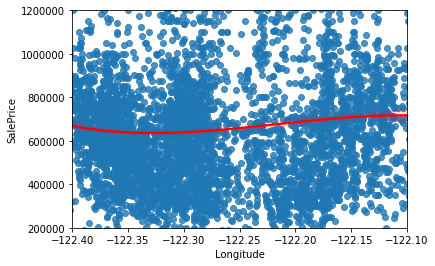

In [57]:
sns.regplot(x='Longitude',y='SalePrice',data=seattle_home_sales,line_kws={'color':'r'},order =3)
plt.ylim(200000,1200000)
plt.xlim(-122.4,-122.1)

## Latitude

*This graph is more dramatic with Latitude.  We see that houses in the southern half of King Country generally sell for less, while homes around 47.62 sell for the most.  If you look at the map above, you will see that this corresponds to the belt that covers the shores of Lake Union, Washinton Park, Magnolia, Queen Anne, and Capital Hill, as well as West Bellevue.  If you live here, none of that suprises you.*

(47.25, 47.8)

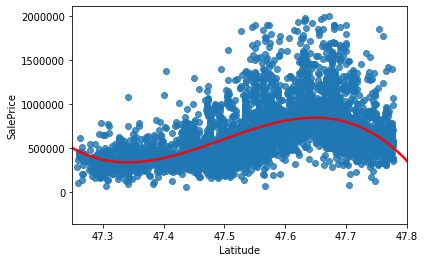

In [50]:
sns.regplot(x='Latitude',y='SalePrice',data=seattle_home_sales,line_kws={'color':'r'},order =3)
#plt.ylim(
plt.xlim(47.25,47.8)

# Features of the Parcels

### BrickStone
* *Remember that `BrickStone` is the percentage of a house made of brick or stones.  We can see in the following two graphs that while buildings made of brick/stone, at least partially, sell for more, buyers seem to prefer a mix of materials, rather than all brick or stone.*

* *I was curious about the trends in building materials over the years.  It turns out that building with brick and stone was more popular from the 1930s and 1940s, but has steadily lost popularity over the years since*

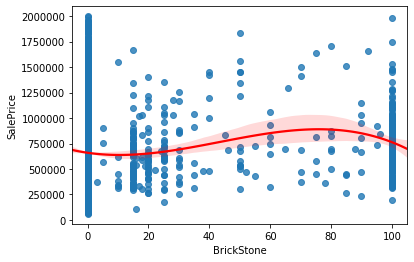

In [51]:
sns.regplot(y='SalePrice',x='BrickStone',data=seattle_home_sales,line_kws={'color':'r'},order =3)


(1910, 2019)

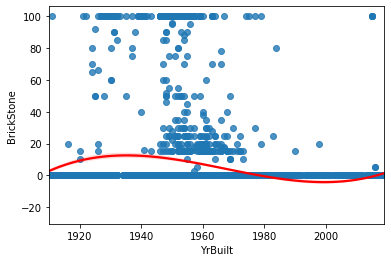

In [52]:
sns.regplot(y='BrickStone',x='YrBuilt',data=seattle_home_sales,line_kws={'color':'r'},order =3)
plt.xlim(1910,2019)

### Building Grade

* *BlgGrade describes the build quality of the home.  We can see above that Grade 9 is one of the most highly correlated variables.  9 means "Better" quality.  Interestingly, 10 (Very good), 11 (Excellent), and 12 (Luxury) correlate to higher prices, but not as much as Grade 9.  I wonder if it's worth building homes of Grade 10, 11, or 12?*  Let's see what our model says after comparing all the features together.

In [55]:
grade = seattle_home_sales[['BldgGrade_4', 'BldgGrade_5', 'BldgGrade_6', 'BldgGrade_7', 'BldgGrade_8', 'BldgGrade_9', 'BldgGrade_10', 'BldgGrade_11','BldgGrade_12','SalePrice']]

pd.DataFrame(grade.corr()['SalePrice'])

,SalePrice
BldgGrade_4,-0.035061
BldgGrade_5,-0.107369
BldgGrade_6,-0.256357
BldgGrade_7,-0.321112
BldgGrade_8,0.158691
BldgGrade_9,0.388335
BldgGrade_10,0.228630
BldgGrade_11,0.110933
BldgGrade_12,0.080707
SalePrice,1.000000


**There are some great insights here!**

*`Stories` ,1st floor square feet, 2nd floor square feet, and square feet of an open porch all correlate between .2 and .33  That's not surprising, those would be thiings I would look at.  

*Total square feet is very strongly correlated, which again makes sense.  It's one of the first things I look at.  But, honestly, I look at bedrooms and bathrooms first.  

*Interestingly.  The strongest correlation is Building Grade.  This represents the quality of the building from 1 = cabin to 13 = mansion.  This is something I think I implicitly look at through pictures.  I never knew the county had a code for such things!*

*Latitude and Longitude have strong correlations to SalePrice.
